In [2]:
import nltk
from nltk.corpus import stopwords  #stopwords
from nltk.stem import WordNetLemmatizer  
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words=set(nltk.corpus.stopwords.words('english'))
import re

from nltk.tokenize import RegexpTokenizer

import pandas as pd

from nltk import word_tokenize



from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\smenta\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [198]:
# https://www.analyticsvidhya.com/blog/2021/07/topic-modelling-with-lda-a-hands-on-introduction/
# https://ourcodingclub.github.io/tutorials/topic-modelling-python/
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html


In [263]:



def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
my_stopwords = my_stopwords+['hi','','edc','xup','p']
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

stop_words=set(nltk.corpus.stopwords.words('english'))


def clean_tweet1(headline):
    # remove user names
    headline = [re.sub('@[\w]+','',x) for x in headline.split()]

    # case conversion
    headline = [x.lower() for x in headline]

    # Remove emojis
    #text = u'This dog \U0001f602'
    #print(text) # with emoji

    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)

    headline = [emoji_pattern.sub(r'', text) for text in headline]

    # Remove url from text
    headline = [re.sub(r'http\S+', '', text) for text in headline]

    # Remove # from text
    headline = [re.sub(r'#', '', text) for text in headline]

    # Remove lead & trail spaces
    headline = [text.lstrip() for text in headline]
    headline = [text.strip() for text in headline]
  
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(" ".join(headline))
    tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text



# cleaning master function
def clean_tweet2(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    #tweet_token_list = [word_rooter(word) if '#' not in word else word
    #                    for word in tweet_token_list] # apply word rooter
    
    
    
    lemmatizer = WordNetLemmatizer()

    # Define function to lemmatize each word with its POS tag

    # POS_TAGGER_FUNCTION : TYPE 1
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None

    sentence = " ".join(tweet_token_list)

    # tokenize the sentence and find the POS tag for each token
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence)) 

    
    # we use our own pos_tagger function to make things simpler to understand.
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    #print(wordnet_tagged)
    #print("-------------") 
    '''
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        #print(tag)
        if tag is None:
            # if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:       
            # else use the tag to lemmatize the token
            print(lemmatizer.lemmatize(word, tag))
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    '''       
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        #print([word,tag])
        if tag in ['a','v','n','None'] :

            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
            #print([word,tag])
        else:       
            # if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
            
        
    
    #print(lemmatized_sentence)
    tweet_token_list= " ".join(lemmatized_sentence)
    tweet=(tweet_token_list)
    #print(sentence)
    #print(lemmatized_sentence)
    #> the cat can be sit with the bat on the striped mat under many fly geese
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1] for i in range(len(tweet_token_list)-1)]
        tweet = ' '.join(tweet_token_list)
    
    return tweet


df = pd.read_csv('tweets_companies.csv')
#df=df.iloc[0:10,:]
df['clean_tweet'] = df.tweet.apply(clean_tweet1)
df['clean_tweet'] = df['clean_tweet'].apply(clean_tweet2)


df.head(2)

,username,date,tweet,clean_tweet
0,CocaCola,2021-11-05 21:01:38,@DJHammm Hi Daniel. Thanks for reaching out. ...,daniel thanks reach like look could please giv...
1,CocaCola,2021-11-05 16:16:48,@nikkers07 Hi for product availability we sugg...,product availability suggest check product loc...


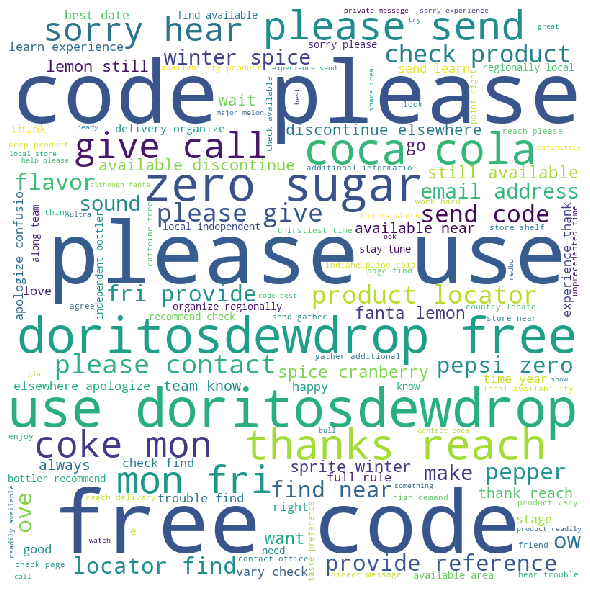

In [270]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
# iterate through the csv file
for val in df.clean_tweet:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [267]:


# the vectorizer object will be used to transform text to vector form
#vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+',ngram_range=(2, 3))
vectorizer =TfidfVectorizer(max_features=10000,max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+',ngram_range=(2, 3))
#vect_text=vect.fit_transform(rev['cleaned_text'])


# apply transformation
tf = vectorizer.fit_transform(df['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

model.fit(tf)



def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        #topic_dict["Topics"]= str(topic_dict["Topic %d words" % (topic_idx)])+"*"+str(topic_dict["Topic %d weights" % (topic_idx)])
    return pd.DataFrame(topic_dict)

no_top_words = 6
topics = display_topics(model, tf_feature_names, no_top_words)
topics
#topics['Name']=topics['Topic 0 words']+"*"+topics['Topic 0 weights']+"+"+topics['Topic 1 words']+"*"+topics['Topic 1 weights']+"+"+topics['Topic 2 words']+"*"+topics['Topic 2 weights']+"+"+topics['Topic 3 words']+"*"+topics['Topic 3 weights']+"+"+topics['Topic 4 words']+"*"+topics['Topic 4 weights']+"+"+topics['Topic 5 words']+"*"+topics['Topic 5 weights']+"+"+ topics['Topic 6 words']+"*"+topics['Topic 6 weights']+"+"+topics['Topic 7 words']+"*"+topics['Topic 7 weights']+"+"+topics['Topic 8 words']+"*"+topics['Topic 8 weights']+"+"+topics['Topic 9 words']+"*"+topics['Topic 9 weights']

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,free code,360.6,still available,69.8,ook like,46.2,zero sugar,199.7,full rule,98.3,redbull givesyouwings,89.8,give call,118.2,sound like,152.0,send code,115.4,please send,107.9
1,please use,360.4,fanta lemon,69.3,please contact,42.6,coca cola,113.5,time year,65.0,product locator,56.6,mon fri,117.3,cola com,72.1,thanks share,87.1,learn experience,61.9
2,doritosdewdrop free,360.0,lemon still,62.7,availability product,40.8,pepsi zero sugar,108.2,thirstiest time,60.8,check product,45.2,stay tune,114.7,please contact,71.1,team know,66.6,email address,59.6
3,doritosdewdrop free code,360.0,fanta lemon still,62.7,available near,40.5,pepsi zero,108.2,thirstiest time year,60.8,check product locator,44.9,get coke,111.5,make sure,65.9,shoot code,41.9,send learn,58.3
4,use doritosdewdrop,360.0,lemon still available,62.3,thank reach,39.0,winter spice,86.1,good vibe,57.7,pa along,40.0,call get,110.3,find near,54.5,help find,40.2,experience thanks,56.5
5,please use doritosdewdrop,360.0,available discontinue,60.9,product vary,35.1,spice cranberry,83.0,local store,44.7,coca cola,39.8,call get coke,110.3,check find,43.9,code team,33.3,please send learn,56.5


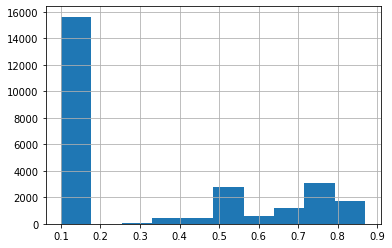

In [265]:
scores = pd.DataFrame(model.transform(tf))

[scores.sum(axis=1).min(),scores.sum(axis=1).max()]
scores_add=scores
scores_add['Dominant Topic']= scores.idxmax(axis = 1)
scores_add['Dominant Topic Score']= scores.iloc[:,0:10].max(axis = 1)

#scores_add.head(2)
scores_add['Dominant Topic Score'].hist()

In [262]:
import numpy as np
print(np.where(scores_add['Dominant Topic Score']<0.5,1,0).sum()/scores_add.shape[0])
scores_add['Dominant Topic Category']=np.where(scores_add['Dominant Topic Score']<0.4,'non-specific topic','specific topic')
print(scores_add.head(2))


topics.to_csv('Topic Summary.csv',index=False)
scores_add.groupby(['Dominant Topic Category','Dominant Topic']).size()

0.6394269649940308
         0        1        2         3         4         5         6  \
0  0.01673  0.01673  0.01673  0.016731  0.016731  0.016731  0.849425   
1  0.02524  0.02524  0.02524  0.025240  0.025240  0.025252  0.025240   

          7         8         9  Dominant Topic  Dominant Topic Score  \
0  0.016731  0.016730  0.016730               6              0.849425   
1  0.025240  0.772824  0.025244               8              0.772824   

  Dominant Topic Category  
0          specific topic  
1          specific topic  


Dominant Topic Category  Dominant Topic
non-specific topic       0                 15674
                         1                    35
                         2                    31
                         3                    35
                         4                    49
                         5                    30
                         6                    47
                         7                    52
                         8                    62
                         9                    62
specific topic           0                  1344
                         1                   722
                         2                   624
                         3                  1051
                         4                  1265
                         5                   710
                         6                  1122
                         7                  1182
                         8                   942
                         9   

In [215]:
'''
# sentence lemmatization examples

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
string = 'the cat is sitting with the bats on the striped mat under many flying geese'
wnl = WordNetLemmatizer()
# Converting String into tokens
list2 = nltk.word_tokenize(string)
print(list2)
#> ['the', 'cat', 'is', 'sitting', 'with', 'the', 'bats', 'on',
#   'the', 'striped', 'mat', 'under', 'many', 'flying', 'geese']
 
lemmatized_string = ' '.join([wnl.lemmatize(words) for words in list2])
 
print(lemmatized_string)  

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
 
lemmatizer = WordNetLemmatizer()
 
# Define function to lemmatize each word with its POS tag
 
# POS_TAGGER_FUNCTION : TYPE 1
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None
 
sentence = 'the cat is sitting with the bats on the striped mat under many badly flying geese'
 
# tokenize the sentence and find the POS tag for each token
pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence)) 
 
print(pos_tagged)
excluded_tags = {"NOUN", "VERB", "ADJ", "ADV", "ADP", "PROPN"}
# we use our own pos_tagger function to make things simpler to understand.
wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
print(wordnet_tagged)
print("-------------") 
lemmatized_sentence = []
for word, tag in wordnet_tagged:
    print([word,tag])
    if tag in ['a','v','n'] :
        
        lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
        #print([word,tag])
    else:       
        # if there is no available tag, append the token as is
        #lemmatized_sentence.append(word)
        lemmatized_sentence
lemmatized_sentence = " ".join(lemmatized_sentence)
 
print(sentence)
print(lemmatized_sentence)
#> the cat can be sit with the bat on the striped mat under many fly geese
'''

'\n# sentence lemmatization examples\n\nnltk.download(\'wordnet\')\nfrom nltk.stem import WordNetLemmatizer\nstring = \'the cat is sitting with the bats on the striped mat under many flying geese\'\nwnl = WordNetLemmatizer()\n# Converting String into tokens\nlist2 = nltk.word_tokenize(string)\nprint(list2)\n#> [\'the\', \'cat\', \'is\', \'sitting\', \'with\', \'the\', \'bats\', \'on\',\n#   \'the\', \'striped\', \'mat\', \'under\', \'many\', \'flying\', \'geese\']\n \nlemmatized_string = \' \'.join([wnl.lemmatize(words) for words in list2])\n \nprint(lemmatized_string)  \n\nimport nltk\nfrom nltk.stem import WordNetLemmatizer\nnltk.download(\'averaged_perceptron_tagger\')\nfrom nltk.corpus import wordnet\n \nlemmatizer = WordNetLemmatizer()\n \n# Define function to lemmatize each word with its POS tag\n \n# POS_TAGGER_FUNCTION : TYPE 1\ndef pos_tagger(nltk_tag):\n    if nltk_tag.startswith(\'J\'):\n        return wordnet.ADJ\n    elif nltk_tag.startswith(\'V\'):\n        return wordnet